In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import Thermobar as pt

## Loading the compiled natural data
- This is all high MgO liquids at Kilauea, with temp calculated using Shea et al. (2022)

In [2]:
df_combo_highFe=pd.read_excel('Natural_data_Temp.xlsx')
Temp_Shea=df_combo_highFe['T_Shea']

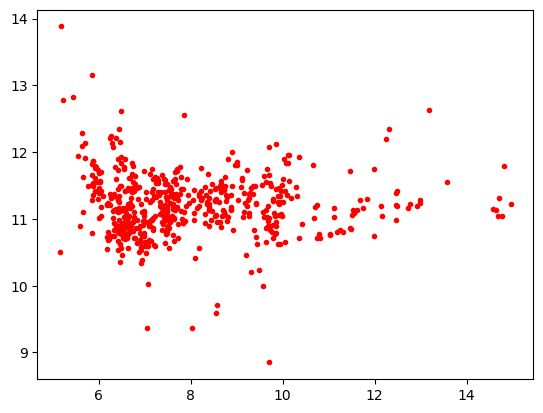

In [3]:
plt.plot(df_combo_highFe['MgO_Liq'], df_combo_highFe['FeOt_Liq'], '.r')

## Now calculate equilibrium olivine content for these
- Here, we use a variety of Fe3FeT contents to work out how Fo-temp-and Fe3Fet are related

In [4]:

Eq_Ol_PET_015=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, 
                            Fe3Fet_Liq=0.15,
Kd_model='Shea2022')
Eq_Ol_PET_015.head()

Eq_Ol_PET_000=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, Fe3Fet_Liq=0,
Kd_model='Shea2022')
Eq_Ol_PET_000.head()

Eq_Ol_PET_010=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, Fe3Fet_Liq=0.1,
Kd_model='Shea2022')
Eq_Ol_PET_010.head()

Eq_Ol_PET_020=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, Fe3Fet_Liq=0.2,
Kd_model='Shea2022')
Eq_Ol_PET_020.head()

Eq_Ol_PET_030=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, Fe3Fet_Liq=0.2,
Kd_model='Shea2022')
Eq_Ol_PET_030.head()

Eq_Ol_PET_005=pt.calculate_eq_ol_content(liq_comps=df_combo_highFe, Fe3Fet_Liq=0.05,
Kd_model='Shea2022')
Eq_Ol_PET_005.head()

,Mg#_Liq_Fe2,Mg#_Liq_Fet,"Eq Fo (Shea, Kd=0.335)","Eq Fo (Shea, Kd=0.325)","Eq Fo (Shea, Kd=0.345)"
0,0.519434,0.506620,0.763398,0.758044,0.768828
1,0.519434,0.506620,0.763398,0.758044,0.768828
2,0.543016,0.530263,0.780077,0.774990,0.785232
3,0.523773,0.510966,0.766525,0.761219,0.771904
4,0.563657,0.551003,0.794071,0.789220,0.798983


## Lets try to fit this data
- Seems a 3rd degree polynomial is the best fit

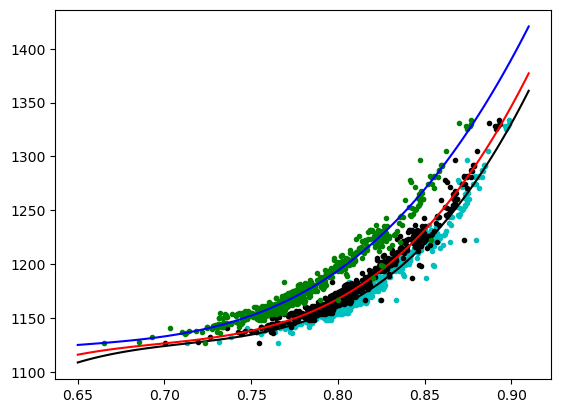

In [5]:
# Generic
N=3
# Fo contents between 65 and 91
Px = np.linspace(0.65, 0.91, 101)

# 30% Fe3
plt.plot(Eq_Ol_PET_030['Eq Fo (Shea, Kd=0.335)'],
         Temp_Shea-273.15,
         '.c')


Pf_030 = np.poly1d(np.polyfit( 
Eq_Ol_PET_030['Eq Fo (Shea, Kd=0.335)'],
Temp_Shea-273.15, N))
Py_030=Pf_030(Px)

plt.plot(Px, Py_030, '-k')

# 15% FE3
plt.plot(Eq_Ol_PET_015['Eq Fo (Shea, Kd=0.335)'],
         Temp_Shea-273.15,
         '.k')



Pf_015 = np.poly1d(np.polyfit( 
Eq_Ol_PET_015['Eq Fo (Shea, Kd=0.335)'],
Temp_Shea-273.15, N))
Py_015=Pf_015(Px)

plt.plot(Px, Py_015, '-r')


# No Fe3
plt.plot(Eq_Ol_PET_000['Eq Fo (Shea, Kd=0.335)'],
         Temp_Shea-273.15,
         '.g')



Pf_000 = np.poly1d(np.polyfit( 
Eq_Ol_PET_000['Eq Fo (Shea, Kd=0.335)'],
Temp_Shea-273.15, N))
Py_000=Pf_000(Px)

plt.plot(Px, Py_000, '-b')

## Lets look at just 15% olivine as that is what our samples likely have

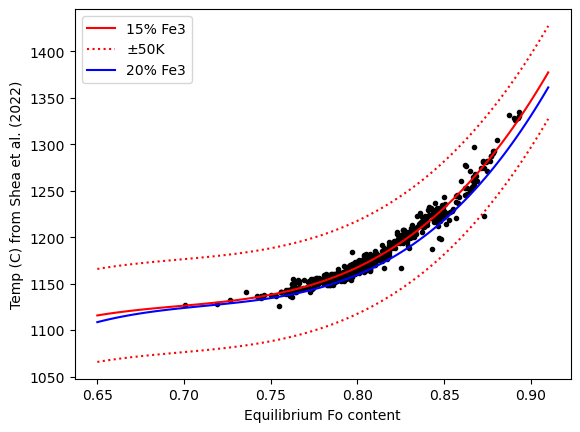

In [6]:
plt.plot(Eq_Ol_PET_015['Eq Fo (Shea, Kd=0.335)'],
         Temp_Shea-273.15,
         '.k')
N=3
Px = np.linspace(0.65, 0.91, 101)

Pf_015 = np.poly1d(np.polyfit( 
Eq_Ol_PET_015['Eq Fo (Shea, Kd=0.335)'],
Temp_Shea-273.15, N))
Py_015=Pf_015(Px)

Pf_020 = np.poly1d(np.polyfit( 
Eq_Ol_PET_020['Eq Fo (Shea, Kd=0.335)'],
Temp_Shea-273.15, N))
Py_020=Pf_020(Px)

plt.plot(Px, Py_015, '-r', label='15% Fe3')

plt.plot(Px, Py_015+50, ':r', label='±50K')
plt.plot(Px, Py_015-50, ':r')
plt.plot(Px, Py_020, '-b', label='20% Fe3')
plt.legend()
plt.xlabel('Equilibrium Fo content')
plt.ylabel('Temp (C) from Shea et al. (2022)')
plt.savefig('regression for 15Fe3.png', dpi=200)

## Model for 15% Fe3

In [7]:
import pickle 
with open('model.pkl', 'wb') as f:
    pickle.dump(Pf_015, f)

import pickle 
with open('model.pkl', 'rb') as f:
    poly_pf = pickle.load(f)


In [8]:
poly_pf(0.80)

1167.5763868259273

## Lets look at the Shea data and see how it does

In [9]:
SheaData=pt.return_cali_dataset(model='Shea2022')
SheaData.head()

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Shea2022_Cali_input.csv


,Unnamed: 0,Reference,Expename,T_K,T(C),DwellatstartT(h),fO2(bar),Fe2+(mol.Frac),Fe3+(mol.Frac),Fe3Fet_Liq,...,Cr2O3_Ol,MnO_Ol,FeOt_Ol,NiO_Ol,MgO_Ol,CaO_Ol,Na2O_Ol,K2O_Ol,P2O5_Ol,TOTAL_Ol
0,0,Shea_2022,k1820-ol2,1513.15,1240,26.0,1.412538e-09,0.082872,0.008817,0.096166,...,0.098159,0.194319,15.508953,0.298837,43.970670,0.248489,0.055257,0.000000,0.001619,99.518022
1,1,Shea_2022,k1820-ol4,1528.15,1255,24.0,2.041738e-09,0.083978,0.008861,0.095440,...,0.091631,0.188108,15.122371,0.320916,44.713950,0.252947,0.004720,0.000000,0.068935,100.327349
2,2,Shea_2022,k1820-ol12,1513.15,1240,24.0,1.995262e-09,0.081228,0.009294,0.102674,...,0.097783,0.186644,14.995139,0.301033,44.427253,0.250712,0.029721,0.006651,0.082666,99.237729
3,3,Shea_2022,k1820-ol13,1513.15,1240,24.0,1.348963e-09,0.080750,0.008525,0.095489,...,0.106581,0.191966,15.556206,0.243682,44.596698,0.262965,0.007975,0.000000,0.086185,100.632891
4,4,Shea_2022,k1820-ol15,1528.15,1255,24.0,1.513561e-09,0.081767,0.008008,0.089203,...,0.095330,0.183322,14.872291,0.284789,45.185753,0.239321,0.005375,0.000000,0.051773,100.131797


C:\Users\penny\AppData\Local\Temp\ipykernel_14784\2780330983.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1217['Fo']=(df_1217['MgO_Ol']/40.3044)/((df_1217['MgO_Ol']/40.3044)+(df_1217['FeOt_Ol']/71.844))


Text(0, 0.5, 'Temp Discrepency')

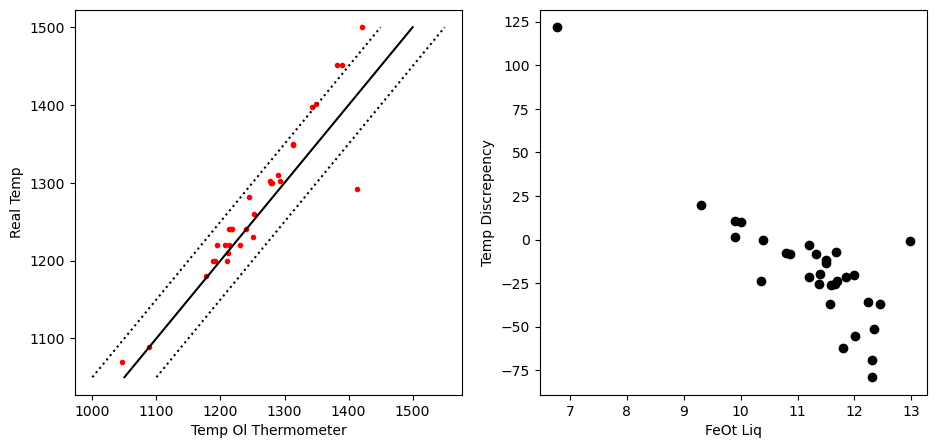

In [10]:
df_1217=SheaData.loc[SheaData['Fe3Fet_Liq'].between(0.10, 0.20)]


df_1217['Fo']=(df_1217['MgO_Ol']/40.3044)/((df_1217['MgO_Ol']/40.3044)+(df_1217['FeOt_Ol']/71.844))
T_Test=Pf_015(df_1217['Fo'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (11,5))
ax1.plot(T_Test, df_1217['T(C)'], '.r')
ax1.plot([1050, 1500], [1050, 1500], '-k')
ax1.plot([1050+50, 1500+50], [1050, 1500], ':k')
ax1.plot([1050-50, 1500-50], [1050, 1500], ':k')

ax2.plot(df_1217['FeOt_Liq'], T_Test-df_1217['T(C)'], 'ok')
ax1.set_xlabel('Temp Ol Thermometer')
ax1.set_ylabel('Real Temp')

ax2.set_xlabel('FeOt Liq')
ax2.set_ylabel('Temp Discrepency')

## Natural dataset

In [11]:
SheaData=pt.return_cali_dataset(model='Shea2022')

Resolved CSV file path: c:\users\penny\box\postdoc\mybarometers\thermobar_outer\src\Thermobar\Shea2022_Cali_input.csv


In [12]:
Shea_FF_Ol=SheaData
Shea_FF_Liq=SheaData

(array([ 1.,  8., 14.,  9.,  0.,  0.,  2.,  2., 14., 18.]),
 array([0.06627898, 0.08134474, 0.0964105 , 0.11147627, 0.12654203,
        0.14160779, 0.15667355, 0.17173932, 0.18680508, 0.20187084,
        0.21693661]),
 <BarContainer object of 10 artists>)

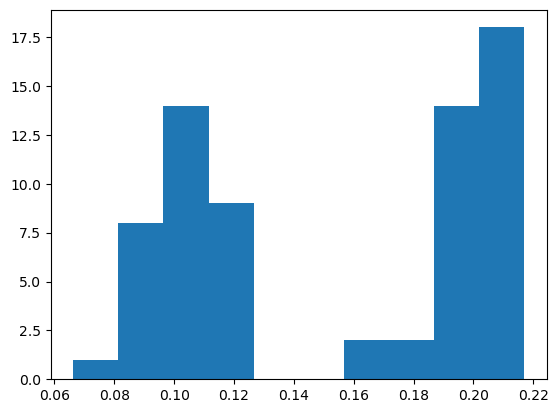

In [13]:
plt.hist(Shea_FF_Liq['Fe3Fet_Liq'])

In [14]:
CalcT_Shea22=pt.calculate_liq_only_temp(liq_comps=Shea_FF_Liq,
                            equationT='T_Shea2022_MgO')

{'R2': '0.98',
 'RMSE': '12.06',
 'RMSE_num': 12.06023,
 'P_val': '0.000',
 'Median': '-2.08',
 'Mean': '0.10',
 'Int': array([0.67573787]),
 'Grad': array([0.99953099])}

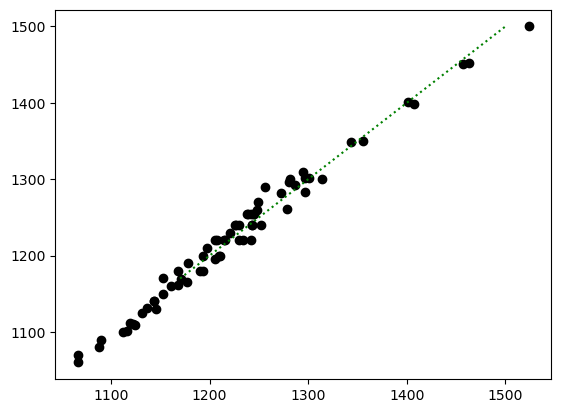

In [15]:
plt.plot(CalcT_Shea22-273.15, 
         SheaData['T_K']-273.15, 'ok')
plt.plot([1170, 1500], [1170, 1500], ':g')
pt.calculate_R2(CalcT_Shea22-273.15, 
         SheaData['T_K']-273.15, xy=False)


In [16]:
calcFo=pt.calculate_ol_fo(ol_comps=Shea_FF_Ol)
calcFo.head()

0    0.834815
1    0.840526
2    0.840796
3    0.836339
4    0.844135
dtype: float64

In [17]:

df_test2=pd.DataFrame(data={'Y': calcFo,
                            'Z': Shea_FF_Liq['Fe3Fet_Liq']
                           })
filt=(df_test2['Z']>0)&(df_test2['Y']>0)
df_test2=df_test2.loc[filt]

X_pred_test2 = Pf_015(calcFo)+273.15


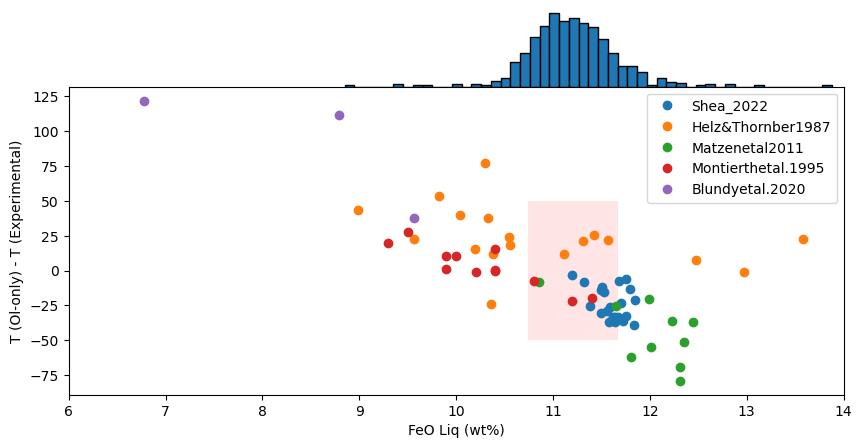

In [18]:
fig, ((ax3b),(ax3a)) = plt.subplots(2, 1, figsize=(10,5),gridspec_kw={'height_ratios': [1, 4]})
plt.subplots_adjust(wspace=0, hspace=0)


SheaData_Filt=SheaData
for ref in SheaData['Reference'].unique():
    ax3a.plot(SheaData['FeOt_Liq'].loc[SheaData_Filt['Reference']==ref],
         X_pred_test2[SheaData['Reference']==ref]-SheaData['T_K'].loc[SheaData['Reference']==ref],
             'o', label=ref
    )
    ax3a.legend()

ax3b.hist(df_combo_highFe['FeOt_Liq'], ec='k', bins=50)
FeO_st=np.mean(df_combo_highFe['FeOt_Liq'])+np.std(df_combo_highFe['FeOt_Liq'])
FeO_st_n=np.mean(df_combo_highFe['FeOt_Liq'])-np.std(df_combo_highFe['FeOt_Liq'])

ax3b.axes.get_xaxis().set_visible(False)
ax3b.axes.get_yaxis().set_visible(False)
ax3b.set_xlim([6, 14])
ax3a.set_xlim([6, 14])
import matplotlib.patches as patches
rect = patches.Rectangle((FeO_st_n,-50),2*np.std(df_combo_highFe['FeOt_Liq']),100,linewidth=1,edgecolor='None',facecolor='r', alpha=0.1,label='test')
# Add the patch to the Axes

ax3a.add_patch(rect)

ax3b.axis("off")
ax3a.set_xlabel('FeO Liq (wt%)')
ax3a.set_ylabel('T (Ol-only) - T (Experimental)')

fig.savefig('Testing_thermometer.png', dpi=200)

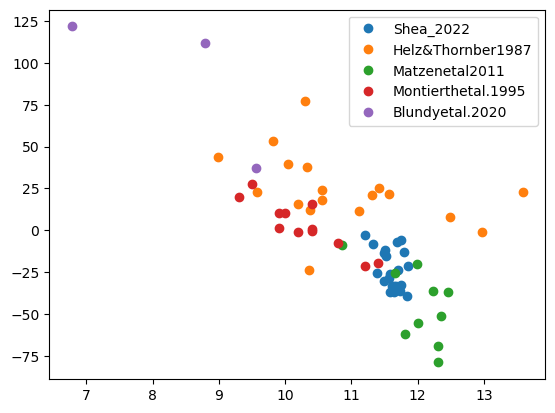

In [19]:
#plt.plot(SheaData['T_K']-273.15,X_pred_test2 , '.r' )

SheaData_Filt=SheaData
for ref in SheaData['Reference'].unique():
    plt.plot(SheaData['FeOt_Liq'].loc[SheaData_Filt['Reference']==ref],
         X_pred_test2[SheaData['Reference']==ref]-SheaData['T_K'].loc[SheaData['Reference']==ref],
             'o', label=ref
    )
    plt.legend()

## Are these exps on the Kilaea LLD?

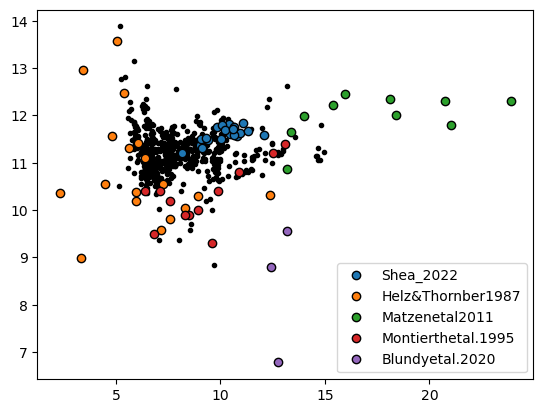

In [20]:
plt.plot(df_combo_highFe['MgO_Liq'], df_combo_highFe['FeOt_Liq'],
         '.k')

SheaData_Filt=SheaData.loc[filt]
for ref in SheaData_Filt['Reference'].unique():
    plt.plot(SheaData_Filt['MgO_Liq'].loc[SheaData_Filt['Reference']==ref],
SheaData_Filt['FeOt_Liq'].loc[SheaData_Filt['Reference']==ref],
             'o', mec='k', label=ref
    )
    plt.legend()